In [48]:
import os
import librosa
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

from scipy import signal

import sounddevice as sd

In [49]:
os.listdir('../data')

['piano', '.DS_Store', 'original', '8-bits']

In [50]:
path_ori = os.path.join('../data/original/', '*.wav')
path_bit = os.path.join('../data/8-bits/', '*.wav')
path_pno = os.path.join('../data/piano/', '*.wav')

In [51]:
files_ori = glob(path_ori)
files_bit = glob(path_bit)
files_pno = glob(path_pno)

files_ori.sort()
files_bit.sort()
files_pno.sort()

In [52]:
file_sets = list(zip(files_ori, files_bit, files_pno))

In [53]:
fs = 44100

In [54]:
for i, file_set in enumerate(file_sets):
#     librosa.core.load(files[i][params.pno_key])
    original_path, chiptune_path, piano_path = file_set
    
    original_stream = librosa.stream(original_path, block_length=1, frame_length=int(fs / 10), hop_length=int(fs/10))
    chiptune_stream = librosa.stream(chiptune_path, block_length=1, frame_length=int(fs / 10), hop_length=int(fs/10))
    piano_stream = librosa.stream(piano_path, block_length=1, frame_length=int(fs / 10), hop_length=int(fs/10))
    
    break

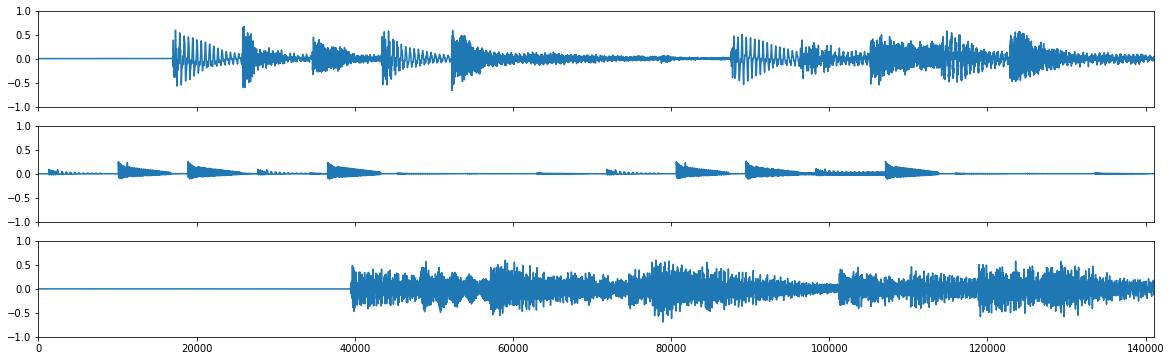

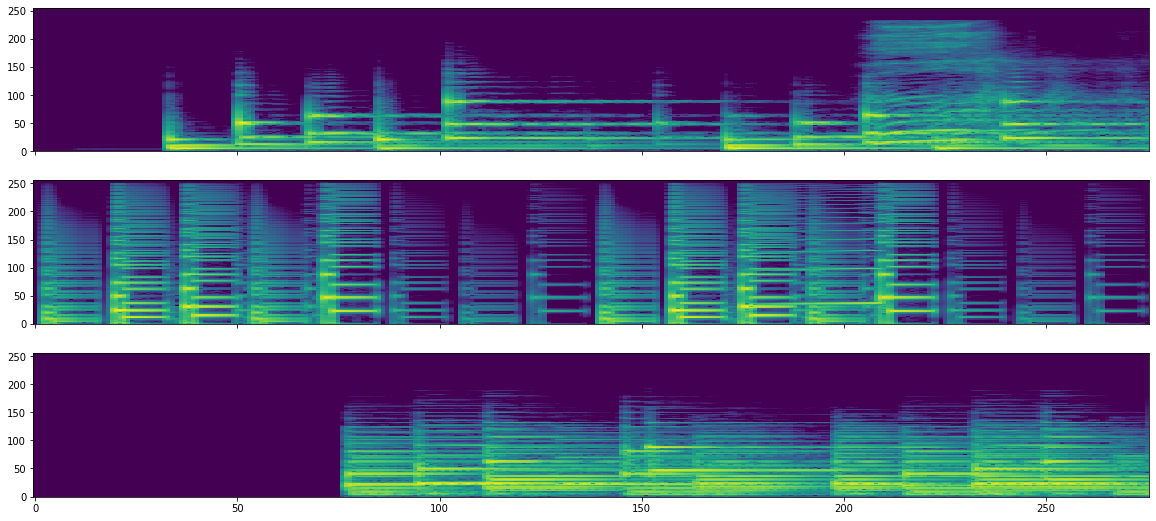

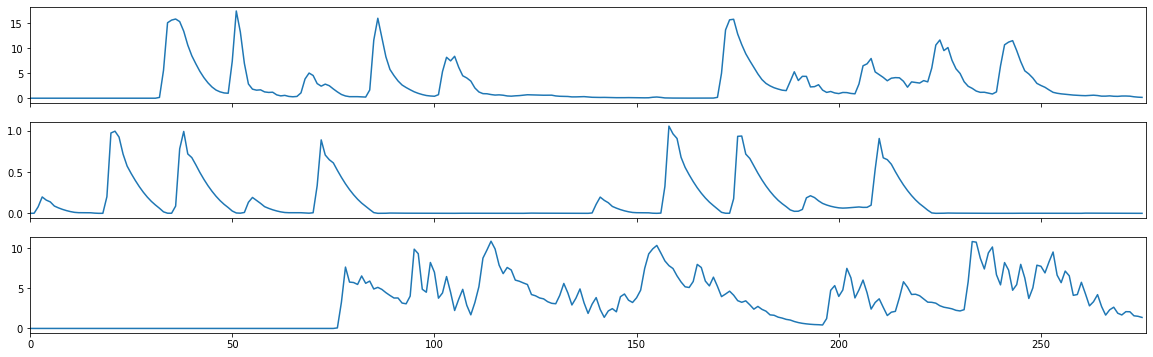

In [8]:
original_buffer = np.empty((0), np.float32)
chiptune_buffer = np.empty((0), np.float32)
piano_buffer = np.empty((0), np.float32)

for i, (block_origin, block_chiptune, block_piano) in enumerate(zip(original_stream, chiptune_stream, piano_stream)):
    
    original_buffer = np.append(original_buffer, block_origin)
    chiptune_buffer = np.append(chiptune_buffer, block_chiptune)
    piano_buffer = np.append(piano_buffer, block_piano)
    
    
    if i > 30:
        break
        
fig, axes = plt.subplots(3, 1, figsize=(20, 6), sharex=True)

axes[0].plot(original_buffer)
axes[0].set_ylim([-1, 1])
axes[0].set_xlim([0, len(original_buffer)])

axes[1].plot(chiptune_buffer)
axes[1].set_ylim([-1, 1])

axes[2].plot(piano_buffer)
axes[2].set_ylim([-1, 1])

plt.show()

fig, axes = plt.subplots(3, 1, figsize=(20, 9), sharex=True)

f, t, Zxx = signal.stft(original_buffer, fs, nperseg=int(fs/10))
specgram = 20 * np.log10(np.maximum(abs(Zxx), 1e-8))
norm_specgram = (specgram + 160) / 160

S = librosa.feature.melspectrogram(y=original_buffer, sr=fs, n_mels=256)
L0 = np.mean(S, axis=0)
S_dB = librosa.power_to_db(S, ref=np.max) 

# axes[0].plot(original_buffer)
# axes[0].imshow(norm_specgram, aspect='auto', origin='reversed')
axes[0].imshow(S_dB, aspect='auto', origin='reversed')

f, t, Zxx = signal.stft(chiptune_buffer, fs, nperseg=int(fs/10))
specgram = 20 * np.log10(np.maximum(abs(Zxx), 1e-8))
norm_specgram = (specgram + 160) / 160

S = librosa.feature.melspectrogram(y=chiptune_buffer, sr=fs, n_mels=256)
L1 = np.mean(S, axis=0)
S_dB = librosa.power_to_db(S, ref=np.max) 

# axes[1].imshow(norm_specgram, aspect='auto', origin='reversed')
axes[1].imshow(S_dB, aspect='auto', origin='reversed')

f, t, Zxx = signal.stft(piano_buffer, fs, nperseg=int(fs/10))
specgram = 20 * np.log10(np.maximum(abs(Zxx), 1e-8))
norm_specgram = (specgram + 160) / 160

S = librosa.feature.melspectrogram(y=piano_buffer, sr=fs, n_mels=256)
L2 = np.mean(S, axis=0)
S_dB = librosa.power_to_db(S, ref=np.max) 

axes[2].imshow(norm_specgram, aspect='auto', origin='reversed')
axes[2].imshow(S_dB, aspect='auto', origin='reversed')

plt.show()

fig, axes = plt.subplots(3, 1, figsize=(20, 6), sharex=True)

axes[0].plot(L0)
axes[0].set_xlim([0, len(L0)])

axes[1].plot(L1) 

axes[2].plot(L2)

plt.show()



In [30]:
sd.play(piano_buffer, fs)

In [42]:
audio = np.stack([original_buffer, chiptune_buffer])

In [43]:
audio.shape

(2, 141120)

In [47]:
sd.play(audio.T, fs)

In [32]:
sd.play(original_buffer, fs)